# **Mount Drive**

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Set Loc. Dir**

In [159]:
%cd /content/drive/My Drive/skripsi
!ls

/content/drive/My Drive/skripsi
jurnal	proposal  python


# **Import Libary dan Module Function**

In [160]:
# import module func_summary.ipynb
%run python/function.ipynb

In [161]:
# Libary
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
try:
  from rouge_score import rouge_scorer
except:
  !pip install rouge-score
  from rouge_score import rouge_scorer

# **Load Dataset**

In [162]:
dataset_dir = 'python/dataset'
dataset_txt = os.listdir(dataset_dir)
dataset_txt.sort()
dataset_txt[0:5]

['003. putusan_851_k_pdt.sus-phi_2020_20210305.txt',
 '006. putusan_1112_k_pdt.sus-phi_2020_20210305.txt',
 '007. putusan_1182_k_pdt.sus-phi_2020_20210305.txt',
 '008. putusan_1195_k_pdt.sus-phi_2020_20210305.txt',
 '009. putusan_1197_k_pdt.sus-phi_2020_20210304.txt']

# **Preprocessing**

In [163]:
all_dokumen_bersih = []
for i in range(0,len(dataset_txt)):
  # setting path
  path = "python/dataset/"+str(dataset_txt[i])

  # load dokumen
  dokumen_bersih = load_data_to_list_lower(path)

  # hapus karakter tidak penting
  dokumen_bersih = hapus_karakter_tidak_penting(dokumen_bersih,"")

  kata_awal = [
    "p u t u s a n",
    "p u t u s a n ",
    "putusan",
    "putusan ",
  ]
  kata_akhir = [
    "hakim-hakim",
    "hakim-hakim ",
    "anggota:",
    "anggota: ",
  ]
  dokumen_bersih = get_bagian_dokumen(dokumen_bersih,kata_awal,kata_akhir)

  # menghapus footer, halaman, dan disclaimer
  dokumen_bersih = hapus_discalimer(dokumen_bersih)

  # masukkan kedalam list
  all_dokumen_bersih.append(dokumen_bersih)

all_dokumen_bersih[0:5]

[['putusan.mahkamahagung.go.id',
  'p u t u s a n',
  'nomor 851 k/pdt.sus-phi/2020',
  'demi keadilan berdasarkan ketuhanan yang maha esa m a h k a m a h   a g u n g',
  'memeriksa perkara perdata khusus perselisihan hubungan industrial pada tingkat kasasi memutus sebagai berikut dalam perkara antara:',
  'pt  nusa  halmahera  mineral,  yang  diwakili  oleh',
  'presiden direktur anang r. noor, berkedudukan di the manhattan square, lantai 3, mid tower, jalan t.b. simatupang, kav. 1-s, rt 10, rw 01, kelurahan cilandak timur, kecamatan pasar minggu, jakarta selatan, dalam hal ini memberi kuasa kepada a. kemalsjah siregar dan kawan- kawan, para advokat pada kantor hukum kemalsjah & associates, beralamat di graha cimb niaga, lantai 8, jalan jenderal sudirman, kav. 58, jakarta selatan, berdasarkan surat kuasa khusus tanggal 27 november 2019;',
  'pemohon kasasi;',
  'l a w a n',
  'ajarani mangkujati, bertempat tinggal di jalan kramat jaya baru ii, nomor 32, rt 015, rw 001, kelurahan johar

# **Segmentasi Sub dokumen**

## 1. Nomor Putusan

In [164]:
all_nomor_putusan = []
cari = [
    "p u t u s a n",
    "p u t u s a n :",
    "putusan:",
    "putusan ",
  ]
for i in range(0,len(dataset_txt)):
  index = cari_index_string(all_dokumen_bersih[i],cari[0],cari[1],cari[2],cari[3])
  all_doc = all_dokumen_bersih[i]
  nomor = all_doc[index]

  all_nomor_putusan.append(nomor)
all_nomor_putusan[0:5]

['nomor 851 k/pdt.sus-phi/2020',
 'nomor 1112 k/pdt.sus-phi/2020',
 'nomor 1182 k/pdt.sus-phi/2020',
 'nomor 1195 k/pdt.sus-phi/2020',
 'nomor 1197 k/pdt.sus-phi/2020']

## 2. Pemohon Kasasi

In [165]:
all_pemohon_kasasi = []
all_nama_pemohon_kasasi = []
for i in range(0,len(dataset_txt)):
  # cari pemohon kasasi
  kata_awal = [
    "antara:",
    "antara: ",
    "perkara:",
    "perkara :",
  ]
  kata_akhir = [
    "pemohon",
    "pemohon ",
    "lawan:",
    "l a w a n:",
  ]
  pemohon_kasasi = get_bagian_dokumen(all_dokumen_bersih[i],kata_awal,kata_akhir)
  pemohon_kasasi = " ".join(pemohon_kasasi)
  pemohon_kasasi = pemohon_kasasi.split(" ")
  pemohon_kasasi = hapus_karakter_tidak_penting(pemohon_kasasi,"")
  pemohon_kasasi = " ".join(pemohon_kasasi)

  # cari nama pemohon kasasi
  nama_pemohon = pemohon_kasasi.split(", ")
  nama_pemohon = nama_pemohon[0]
  nama_pemohon = nama_pemohon.split(" ")
  nama_pemohon = " ".join(nama_pemohon)
  
  # masukkan kedalam list
  all_pemohon_kasasi.append(pemohon_kasasi)
  all_nama_pemohon_kasasi.append(nama_pemohon)
  
all_pemohon_kasasi[0:5]

['pt nusa halmahera mineral, yang diwakili oleh presiden direktur anang r. noor, berkedudukan di the manhattan square, lantai 3, mid tower, jalan t.b. simatupang, kav. 1-s, rt 10, rw 01, kelurahan cilandak timur, kecamatan pasar minggu, jakarta selatan, dalam hal ini memberi kuasa kepada a. kemalsjah siregar dan kawan- kawan, para advokat pada kantor hukum kemalsjah & associates, beralamat di graha cimb niaga, lantai 8, jalan jenderal sudirman, kav. 58, jakarta selatan, berdasarkan surat kuasa khusus tanggal 27 november 2019; pemohon kasasi;',
 'pt bina san prima, yang diwakili oleh direktur drs. setiawan thahjadi, berkedudukan di jalan harun sohar, komplek palembang star, blok a 16, 17, 18, kota palembang, dalam hal ini memberi kuasa kepada meisal suhardi, s.h. dan kawan, para advokat pada kantor hukum law firm astari & partners, beralamat di jalan sukabangun i, lr. kito, nomor 1143, rt 022, rw 003, kelurahan suka bangun, kecamatan sukarami, kota palembang, sumatera selatan, berdasark

## 3. Termohon Kasasi

In [166]:
all_termohon_kasasi = []
all_nama_termohon_kasasi = []
for i in range(0,len(dataset_txt)):
  # cari termohon kasasi
  kata_awal = [
    "l a w a n",
    "l a w a n ",
    "lawan ",
    "lawan:",
  ]
  kata_akhir = [
    "termohon",
    "termohon ",
    "tersebut",
    "tersebut; ",
  ]
  termohon_kasasi = get_bagian_dokumen(all_dokumen_bersih[i],kata_awal,kata_akhir)
  termohon_kasasi = " ".join(termohon_kasasi)
  termohon_kasasi = termohon_kasasi.split(" ")
  termohon_kasasi = hapus_karakter_tidak_penting(termohon_kasasi,"")
  termohon_kasasi = " ".join(termohon_kasasi)

  # cari nama termohon kasasi
  nama_termohon = termohon_kasasi.split(", ")
  nama_termohon = nama_termohon[0]
  nama_termohon = nama_termohon.split(" ")
  nama_termohon = " ".join(nama_termohon)

  # masukkan kedalam list
  all_termohon_kasasi.append(termohon_kasasi)
  all_nama_termohon_kasasi.append(nama_termohon)

all_termohon_kasasi[0:5]

['ajarani mangkujati, bertempat tinggal di jalan kramat jaya baru ii, nomor 32, rt 015, rw 001, kelurahan johar baru, kecamatan johar baru, jakarta pusat, dalam hal ini memberi kuasa kepada asnifriyanti damanik, s.h., advokat pada bk law office, beralamat di jalan radar auri, ruko pondok cibubur, blok e 11, cimanggis, depok, jawa barat, berdasarkan surat kuasa khusus tanggal 23 desember 2019; termohon kasasi; mahkamah agung tersebut;',
 'muhammad sumadi, bertempat tinggal di jalan panca usaha, rt 54, rw 12, kelurahaan 5 ulu, kecamatan seberang ulu i, kota palembang, dalam hal ini memberi kuasa kepada ramlianto, pengurus, pada serikat buruh sriwijaya (sb sri), beralamat di komplek phdm i, nomor 102 a, rt 042, rw 001, kelurahan kalidoni, kecamatan kalidoni, kota palembang, berdasarkan surat kuasa khusus tanggal 5 juni 2020; termohon kasasi; mahkamah agung tersebut;',
 'suryanto, hrd pt security phisik dinamika, berkedudukan di jalan bina marga, nomor 30, kelurahan sanja, kecamatan citeur

## 3. Pokok Perkara

In [167]:
all_pokok_perkara = []
for i in range(0,len(dataset_txt)):
  # batasi bagian dokumen yang akan di summerisation dengan kata kunci awal dan akhir, 
  # disetting harus 4 kata kunci, bila ingin tambah atau dikurangi edit dibagian fungsi
  kata_awal = [
    "dalam pokok perkara:",
    "dalam pokok perkara :",
    "primair:",
    "subdair:",
    "menimbang,",
    "menimbang, ",
  ]
  kata_akhir = [
    "keberatan-keberatan ",
    "keberatan-keberatan",
    "alasan-alasan",
    "alasan-alasan ",
    "pertimbangan",
    "pertimbangan ",
  ]
  dokumen_putusan = get_bagian_dokumen2(all_dokumen_bersih[i],kata_awal,kata_akhir)

  # menghapus footer, halaman, dan disclaimer
  dokumen_putusan = hapus_discalimer(dokumen_putusan)
  all_pokok_perkara.append(dokumen_putusan)
all_pokok_perkara[0:1]

[['penggugat telah  mengajukan gugatan  di  depan  persidangan pengadilan',
  'hubungan industrial pada pengadilan negeri ternate dan memohon kepada',
  'pengadilan untuk memberikan putusan sebagai berikut: dalam provisi:',
  '1.   mengabulkan permohonan provisi dari penggugat untuk seluruhnya;',
  '2.   menghukum  tergugat  untuk  membayar  terlebih  dahulu  (uang  muka) biaya transportasi dan akomodasi penggugat dalam proses pengajuan gugatan pemutusan hubungan kerja di pengadilan hubungan industrial pada pengadilan negeri ternate sebesar rp9.000.000,00 x 12 persidangan = rp108.000.000,00 (seratus delapan juta rupiah). setelah putusan ini dibacakan dalam persidangan;',
  'dalam pokok perkara:',
  '1.   menerima gugatan penggugat untuk seluruhnya;',
  '2.   menyatakan   pemutusan   hubungan   kerja   yang   dilakukan   tergugat terhadap penggugat pada tanggal 24 desember 2018 batal demi hukum;',
  '3.  menyatakan tergugat telah melakukan perbuatan yang bertentangan dengan undang undan

## 4. Pertimbangan Hakim

In [168]:
all_pertimbangan_hakim = []
for i in range(0,len(dataset_txt)):
  # batasi bagian dokumen yang akan di summerisation dengan kata kunci awal dan akhir, 
  # disetting harus 4 kata kunci, bila ingin tambah atau dikurangi edit dibagian fungsi
  kata_awal = [
    "keberatan-keberatan",
    "keberatan-keberatan ",
    "keberatan-keberatan  ",
    "alasan-alasan",
    "alasan-alasan ",
    "alasan-alasan   ",
  ]
  kata_akhir = [
    "memperhatikan,",
    "memperhatikan,  ",
    "memperhatikan ,",
    "memperhatikan , ",
    "m e n g a d i l i:",
    "m e n g a d i l i :",
  ]
  dokumen_putusan = get_bagian_dokumen2(all_dokumen_bersih[i],kata_awal,kata_akhir)

  # menghapus footer, halaman, dan disclaimer
  dokumen_putusan = hapus_discalimer(dokumen_putusan)
  all_pertimbangan_hakim.append(dokumen_putusan)
all_pertimbangan_hakim[0:1]

[['agung berpendapat:',
  'bahwa alasan-alasan permohonan kasasi dari pemohon kasasi tersebut tidak dapat dibenarkan, oleh karena setelah membaca dan meneliti memori kasasi tanggal 9 desember 2019 dan kontra memori kasasi tanggal',
  '27 desember 2019, dihubungkan dengan pertimbangan judex facti, dalam hal  ini  pengadilan  hubungan  industrial  pada  pengadilan  negeri  ternate telah benar menerapkan hukum menyatakan pemutusan hubungan kerja dengan pertimbangan sebagai berikut:',
  '-     bahwa mutasi penggugat dari manager school licence & stake holder relations ke departemen mine closure plan merupakan mutasi demosi yang tidak beralasan hukum sebagaimama telah dipertimbangkan judex facti berdasarkan alat bukti karena principal social mine closure berada di bawah dan bertanggung jawab kepada manajer mine closure plan, diperintah dan diberi tugas oleh manager mine closure plan serta membuat laporan kepada manager mine closure plan. manager mine closure plan dapat melakukan pembinaan a

## 5. Amar Putusan

In [169]:
all_amar = []
for i in range(0,len(dataset_txt)):
  # batasi bagian dokumen yang akan di summerisation dengan kata kunci awal dan akhir, 
  # disetting harus 4 kata kunci, bila ingin tambah atau dikurangi edit dibagian fungsi
  kata_awal = [
      "m e n g a d i l i",
      "m e n g a d i l i:",
      "m e n g a d i l i: ",
      "m e n g a d i l i :",
      "m  e  n  g  a  d  i  l  i  :",
      "m  e  n  g  a  d  i  l  i  : ",
      # "mengadili :",
    ]
  kata_akhir = [
      "demikianlah ",
      "demikianlah",
      "demikianlah  ",
      "dihadiri",
      "dihadiri ",
      "anggota-anggota ",
    ]
  dokumen_putusan = get_bagian_dokumen2(all_dokumen_bersih[i],kata_awal,kata_akhir)
  all_amar.append(dokumen_putusan)
all_amar[3:4]

[['1.   menolak permohonan kasasi dari pemohon kasasi pt   laut united (pengusaha)tersebut;',
  '2.   memperbaiki  amar   putusan  pengadilan  hubungan  industrial  pada pengadilan   negeri   medan   nomor   251/pdt.sus-phi/2017/pn  mdn. tanggal 20 februari 2017 sehingga amar selengkapnya sebagai berikut: dalam eksepsi:',
  '-     menolak eksepsi tergugat untuk seluruhnya; dalam pokok perkara:',
  '1.   mengabulkan gugatan penggugat untuk sebagian;',
  '2.  menyatakan hubungan kerja antara penggugat dengan tergugat berubah menjadi perjanjian kerja waktu tidak tertentu (pkwtt);',
  '3.   menghukum tergugat untuk membayar hak-hak penggugat sebesar',
  'rp55.104.608,00 dengan perincian sebagai berikut:',
  '-     uang pesangon:',
  '2 x 8 x rp2.528.815,00                                 =  rp40.461.040,00',
  '-     uang penghargaan masa kerja:',
  '3 x rp2.528.815,00                                       =  rp  7.586.445,00',
  '-     uang penggantian hak:',
  '15% x rp48.047.485,00     

# **Pembobotan**

Pembobotan dilakukan hanya pada Pokok Perkara, Pertimbangan Hakim dan Amar

## 1. Pokok Perkara


In [170]:
all_bobot = []
for i in range(0,len(dataset_txt)):
  # pembobotan & input matriks
  hasil_pembobotan_matriks = pembobotan_matriks(all_pokok_perkara[i])
  all_bobot.append(hasil_pembobotan_matriks)

# print(all_bobot[i].todense())

## lihat semua
for i in range(0,5):
  print(all_bobot[i].todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [1 1 0 ... 1 0 2]
 [0 0 0 ... 0 0 1]
 ...
 [1 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


## 2. Pertimbangan Hakim

In [171]:
all_bobot_pertimbangan_hakim = []
for i in range(0,len(dataset_txt)):
  # pembobotan & input matriks
  hasil_pembobotan_matriks = pembobotan_matriks(all_pertimbangan_hakim[i])
  all_bobot_pertimbangan_hakim.append(hasil_pembobotan_matriks)

# print(all_bobot_pertimbangan_hakim[i].todense())

## lihat semua
for i in range(0,5):
  print(all_bobot_pertimbangan_hakim[i].todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 2 1 0]
 [0 0 0 ... 2 0 1]
 [1 2 0 ... 2 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [1 2 0 ... 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 

## 3. Amar Putusan

In [172]:
all_bobot_amar = []
for i in range(0,len(dataset_txt)):
  # pembobotan & input matriks
  hasil_pembobotan_matriks = pembobotan_matriks(all_amar[i])
  all_bobot_amar.append(hasil_pembobotan_matriks)

# print(all_bobot_amar[i].todense())

# # lihat semua
for i in range(0,5):
  print(all_bobot_amar[i].todense())

[[1 1 2 1 1 1 1 1 1 1]]
[[0 1 1 2 0 0 1 0 1 0 1 1 1 1 1]
 [1 0 0 0 1 1 0 1 0 1 0 0 0 0 0]]
[[0 1 1 1 2 0 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 1 0 1 0 1 0 0]]
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Dekomposisi Matriks (SVD) dan Normalisasi Data**

`Dekomposisi Matriks dilakukan hanya pada Pokok Perkara, Pertimbangan Hakim dan Amar`

## 1. Pokok Perkara

In [173]:
dekomposisi_dict = {}
for i in range(0,len(dataset_txt)):
  # dekomposisi matriks
  hasil_dekomposisi = dekomposisi_matriks(all_bobot[i])

  # normalisasi data
  endcoder_data = normalisasi_data_dan_input_ke_table2(hasil_dekomposisi)
  endcoder_data = batasi_desimal_pandas(endcoder_data,'bobot_dokumen')

  normalisasi = []
  for k in endcoder_data['bobot_dokumen']:
    normalisasi.append(k)

  # pandas to dict
  name = "doc_{}".format(i+1)
  dekomposisi_dict[name] = normalisasi

# lihat semua
for j in range(5):
  name = "doc_{}".format(j+1)
  print("{} : {}".format(name,dekomposisi_dict[name]))

doc_1 : [0.1054, 0.2217, 0.1153, 0.0703, 0.8801, 0.0154, 0.0521, 0.228, 0.1267, 0.3037, 0.9042, 0.6977, 0.1164, 0.0575, 0.6234, 0.3509, 0.0987, 0.2249, 0.0732, 0.5181, 0.0121, 0.0482, 0.0479, 0.1655, 0.6027, 0.3383, 0.0677, 0.5412, 0.1473, 1.0, 0.2686, 0.3065, 0.1194, 0.4277, 0.0417, 0.0736, 0.1223, 0.0749, 0.0217, 0.0572, 0.1223, 0.0693, 0.0175, 0.3715, 0.0825, 0.0296, 0.0285, 0.1058, 0.0518, -0.0, 0.3663]
doc_2 : [0.0679, 0.2327, 0.0057, 0.0167, 0.1688, 0.1432, 0.086, 0.2508, 0.0706, 0.0186, 0.0043, 0.0043, 0.0045, 0.0001, 0.1141, 0.0112, 0.0697, 0.0047, 0.0861, 0.0594, 0.1046, -0.0, 0.4563, 0.0166, 0.1223, 0.1218, 0.0761, 0.1062, 0.0052, 0.0053, 0.0001, 0.0408, 0.0017, 0.6647, 1.0, 0.2856, 0.3162, 0.0984, 0.1656, 0.1507, 0.0386, 0.0078, 0.0186, 0.3765]
doc_3 : [0.0703, 0.488, 0.0345, 0.0096, 0.1005, 0.0654, 0.3602, 0.1024, 0.2238, 0.6346, 0.0195, 0.5609, 0.0588, 0.1695, 0.2271, 0.786, 0.08, 0.1631, 0.0551, 0.0655, 0.0203, 0.0203, 0.0223, 0.0203, 0.0585, 0.0001, 0.0416, 0.0979, 0.078

## 2. Pertimbangan Hakim

In [174]:
dekomposisi_dict = {}
for i in range(0,len(dataset_txt)):
  # dekomposisi matriks
  hasil_dekomposisi = dekomposisi_matriks(all_bobot_pertimbangan_hakim[i])

  # normalisasi data
  endcoder_data = normalisasi_data_dan_input_ke_table2(hasil_dekomposisi)
  endcoder_data = batasi_desimal_pandas(endcoder_data,'bobot_dokumen')

  normalisasi = []
  for k in endcoder_data['bobot_dokumen']:
    normalisasi.append(k)

  # pandas to dict
  name = "doc_{}".format(i+1)
  dekomposisi_dict[name] = normalisasi

dekomposisi_dict
for j in range(0,5):
  name = "doc_{}".format(j+1)
  print("{} : {}".format(name,dekomposisi_dict[name]))

doc_1 : [0.0, 0.0788, 0.1018, 1.0, 0.0117, 0.0249, 0.1083, 0.1403, 0.083]
doc_2 : [0.0039, 0.2191, 0.2955, 0.3173, 1.0, 0.9233, 0.8927, 0.4307, 0.8079, 0.6197]
doc_3 : [0.0, 0.1597, 0.0598, 0.2841, 1.0, 0.4687, 0.377]
doc_4 : [0.0062, 0.4449, 0.6293, 1.0, 0.0501, 0.1659, 0.9719, 0.2786, 0.12, 0.5628, 0.7102, 0.4273]
doc_5 : [0.0137, 0.8006, 0.2291, 1.0, 0.1149, 0.6694, 0.7156, 0.0851, 0.1348, 0.7034, 0.0973, 0.6589]


## 3. Amar Putusan

In [175]:
dekomposisi_dict = {}
for i in range(0,len(dataset_txt)):
  # dekomposisi matriks
  hasil_dekomposisi = dekomposisi_matriks(all_bobot_amar[i])

  # normalisasi data
  endcoder_data = normalisasi_data_dan_input_ke_table2(hasil_dekomposisi)
  endcoder_data = batasi_desimal_pandas(endcoder_data,'bobot_dokumen')

  normalisasi = []
  for k in endcoder_data['bobot_dokumen']:
    normalisasi.append(k)

  # pandas to dict
  name = "doc_{}".format(i+1)
  dekomposisi_dict[name] = normalisasi

dekomposisi_dict
for j in range(5):
  name = "doc_{}".format(j+1)
  print("{} : {}".format(name,dekomposisi_dict[name]))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


doc_1 : [1.0]
doc_2 : [1.0, 0.0]
doc_3 : [1.0, 0.0, -0.0]
doc_4 : [0.0059, 0.788, 0.081, 0.0584, 0.141, 0.2467, 0.4129, 0.0023, 0.3843, 0.0106, 0.4081, 0.0722, 0.827, 1.0, 0.0644, 0.0025]
doc_5 : [0.0029, 0.0, 0.0579, 0.0029, 0.0, 0.005, -0.0, 0.0655, 0.0757, 0.0044, 0.0579, 0.1491, 0.0467, 1.0, 0.0681, 0.0421]


# **Ekstraksi Dokumen dengan LSA dan CLSA**

`Ekstraksi dilakukan hanya pada Pokok Perkara, Pertimbangan Hakim dan Amar`

## 1. Pokok Perkara Latent Semantic Analys (LSA)

In [176]:
all_lsa_pokok_perkara = []
compression_rate = 0.4
for i in range(0,len(dataset_txt)):
  all_lsa_pokok_perkara.append(LSA(all_pokok_perkara[i],compression_rate))

all_lsa_pokok_perkara[0:5]

['menghukum tergugat untuk membayar terlebih dahulu (uang muka) biaya transportasi dan akomodasi penggugat dalam proses pengajuan gugatan pemutusan hubungan kerja di pengadilan hubungan industrial pada pengadilan negeri ternate sebesar rp9.000.000,00 x 12 persidangan = rp108.000.000,00 (seratus delapan juta rupiah). setelah putusan ini dibacakan dalam persidangan;. 5. menghukum tergugat untuk membayar pesangon dan kompensasi sebesar 3 x pkb yakni 3 x 13,42 bulan x rp64.464.000,00 (enam puluh empat juta empat ratus enam puluh empat ribu rupiah) = rp2.595.320.640,00 (dua miliar lima ratus sembilan puluh lima juta tiga ratus dua puluh ribu enam ratus empat puluh rupiah);. 6. menghukum tergugat untuk membayar upah dan tunjangan penggugat selama proses penyelesaian yakni tanggal 15 januari 2019 sampai ada putusan pengadilan yang berkekuatan hukum tetap sebesar rp74.800.266,00 (tujuh puluh empat juta delapan ratus ribu dua ratus enam puluh enam rupiah) untuk setiap bulannya;. hubungan kerja 

## 2. Pokok Perkara Cross Latent Semantic Analys (CLSA)

In [177]:
all_clsa_pokok_perkara = []
for i in range(0,len(dataset_txt)):
  all_clsa_pokok_perkara.append(CLSA(all_pokok_perkara[i]))

all_clsa_pokok_perkara[0:5]

['menghukum tergugat untuk membayar terlebih dahulu (uang muka) biaya transportasi dan akomodasi penggugat dalam proses pengajuan gugatan pemutusan hubungan kerja di pengadilan hubungan industrial pada pengadilan negeri ternate sebesar rp9.000.000,00 x 12 persidangan = rp108.000.000,00 (seratus delapan juta rupiah). setelah putusan ini dibacakan dalam persidangan;. 2. menyatakan pemutusan hubungan kerja yang dilakukan tergugat terhadap penggugat pada tanggal 24 desember 2018 batal demi hukum;. 4. menyatakan hubungan kerja antara penggugat dan tergugat putus karena pemutusan hubungan kerja yang dilakukan tergugat terhitung sejak putusan ini mempunyai kekuatan hukum tetap;. 5. menghukum tergugat untuk membayar pesangon dan kompensasi sebesar 3 x pkb yakni 3 x 13,42 bulan x rp64.464.000,00 (enam puluh empat juta empat ratus enam puluh empat ribu rupiah) = rp2.595.320.640,00 (dua miliar lima ratus sembilan puluh lima juta tiga ratus dua puluh ribu enam ratus empat puluh rupiah);. 6. menghu

## 3. Pertimbangan Hakim Latent Semantic Analys (LSA)

In [178]:
all_lsa_pertimbangan_hakim = []
compression_rate = 0.4
for i in range(0,len(dataset_txt)):
  all_lsa_pertimbangan_hakim.append(LSA(all_pertimbangan_hakim[i],compression_rate))

all_lsa_pertimbangan_hakim[0:5]

['bahwa mutasi penggugat dari manager school licence & stake holder relations ke departemen mine closure plan merupakan mutasi demosi yang tidak beralasan hukum sebagaimama telah dipertimbangkan judex facti berdasarkan alat bukti karena principal social mine closure berada di bawah dan bertanggung jawab kepada manajer mine closure plan, diperintah dan diberi tugas oleh manager mine closure plan serta membuat laporan kepada manager mine closure plan. manager mine closure plan dapat melakukan pembinaan apabila kinerja dari principal social mine closure kurang/tidak baik, sehingga pemutusan hubungan kerja beralasan hukum dengan alasan disharmonis sesuai penjelasan umum alinea iii undang undang nomor 2 tahun 2004 tentang penyelesaian perselisihan hubungan industrial yang pada pokoknya menyatakan hubungan kerja harus merupakan kesepakatan para pihak (pekerja dengan pengusaha);',
 'bahwa tepat pemutusan hubungan kerja tanpa kesalahan dalam hubungan kerja perjanjian kerja waktu tidak tertentu

## 4. Pertimbangan Hakim Cross Latent Semantic Analys (CLSA)

In [179]:
all_clsa_pertimbangan_hakim = []
for i in range(0,len(dataset_txt)):
  all_clsa_pertimbangan_hakim.append(CLSA(all_pertimbangan_hakim[i]))

all_clsa_pertimbangan_hakim[0:5]

['bahwa mutasi penggugat dari manager school licence & stake holder relations ke departemen mine closure plan merupakan mutasi demosi yang tidak beralasan hukum sebagaimama telah dipertimbangkan judex facti berdasarkan alat bukti karena principal social mine closure berada di bawah dan bertanggung jawab kepada manajer mine closure plan, diperintah dan diberi tugas oleh manager mine closure plan serta membuat laporan kepada manager mine closure plan. manager mine closure plan dapat melakukan pembinaan apabila kinerja dari principal social mine closure kurang/tidak baik, sehingga pemutusan hubungan kerja beralasan hukum dengan alasan disharmonis sesuai penjelasan umum alinea iii undang undang nomor 2 tahun 2004 tentang penyelesaian perselisihan hubungan industrial yang pada pokoknya menyatakan hubungan kerja harus merupakan kesepakatan para pihak (pekerja dengan pengusaha);',
 'bahwa tepat pemutusan hubungan kerja tanpa kesalahan dalam hubungan kerja perjanjian kerja waktu tidak tertentu

## 5. Amar Putusan Latent Semantic Analys (LSA)

In [180]:
all_lsa_amar = []
compression_rate = 0.4
for i in range(0,len(dataset_txt)):
  all_lsa_amar.append(LSA(all_amar[i],compression_rate))
  
all_lsa_amar[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/

['menolak permohonan kasasi dari pemohon kasasi pt nusa halmahera mineral tersebut;',
 'menolak permohonan kasasi dari pemohon kasasi pt bina san prima tersebut;',
 'menolak permohonan kasasi dari pemohon kasasi heara halawa',
 'memperbaiki amar putusan pengadilan hubungan industrial pada pengadilan negeri medan nomor 251/pdt.sus-phi/2017/pn mdn. tanggal 20 februari 2017 sehingga amar selengkapnya sebagai berikut: dalam eksepsi:. rp55.104.608,00 dengan perincian sebagai berikut:. 3 x rp2.528.815,00 = rp 7.586.445,00. 15% x rp48.047.485,00 = rp 7.057.123,00 + total = rp55.104.608,00. 4. sehingga total keseluruhan hak-hak penggugat sebesar rp55.104.608,00 (lima puluh lima juta seratus empat ribu enam ratus delapan rupiah);',
 'menghukum tergugat membayar uang kompensasi pemutusan hubungan kerja kepada penggugat sejumlah rp14.019.280,00 (empat belas juta sembilan belas ribu dua ratus delapan puluh rupiah);']

## 6. Amar Putusan Cross Latent Semantic Analys (CLSA)

In [181]:
all_clsa_amar = []
for i in range(0,len(dataset_txt)):
  all_clsa_amar.append(CLSA(all_amar[i]))

all_clsa_amar[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_truncated_svd.py:194: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/usr/local/lib/python3.7/

['menolak permohonan kasasi dari pemohon kasasi pt nusa halmahera mineral tersebut;',
 'menolak permohonan kasasi dari pemohon kasasi pt bina san prima tersebut;',
 'menolak permohonan kasasi dari pemohon kasasi heara halawa',
 'memperbaiki amar putusan pengadilan hubungan industrial pada pengadilan negeri medan nomor 251/pdt.sus-phi/2017/pn mdn. tanggal 20 februari 2017 sehingga amar selengkapnya sebagai berikut: dalam eksepsi:. rp55.104.608,00 dengan perincian sebagai berikut:. 2 x 8 x rp2.528.815,00 = rp40.461.040,00. 3 x rp2.528.815,00 = rp 7.586.445,00. 15% x rp48.047.485,00 = rp 7.057.123,00 + total = rp55.104.608,00. 4. sehingga total keseluruhan hak-hak penggugat sebesar rp55.104.608,00 (lima puluh lima juta seratus empat ribu enam ratus delapan rupiah);',
 'menyatakan putus hubungan kerja antara penggugat dengan. 3. menghukum tergugat membayar uang kompensasi pemutusan hubungan kerja kepada penggugat sejumlah rp14.019.280,00 (empat belas juta sembilan belas ribu dua ratus dela

# **Evaluasi Ekstraksi Perbagian**

## **1. Load Data Pakar**

### a. Nomor Putusan

In [182]:
pakar_nomor = 'python/rangkuman_pakar/perbagian/0.nomor'
pakar_nomor = os.listdir(pakar_nomor)
pakar_nomor.sort()

hasil_pakar_nomor = []
for i in range(0,len(pakar_nomor)):
  path = "python/rangkuman_pakar/perbagian/0.nomor/"+str(pakar_nomor[i])
  # load dokumen
  list_pakar_nomor = load_data_to_list_lower(path)
  hasil_pakar_nomor.append(list_pakar_nomor[0])
hasil_pakar_nomor[0:5]

['nomor 851 k/pdt.sus-phi/2020',
 'nomor 1112 k/pdt.sus-phi/2020',
 'nomor 1182 k/pdt.sus-phi/2020',
 'nomor 1195 k/pdt.sus-phi/2020',
 'nomor 1197 k/pdt.sus-phi/2020']

### b. Pemohon Kasasi

In [183]:
pakar_pemohon = 'python/rangkuman_pakar/perbagian/1. pemohon'
pakar_pemohon = os.listdir(pakar_pemohon)
pakar_pemohon.sort()

hasil_pakar_pemohon = []
for i in range(0,len(pakar_pemohon)):
  path = "python/rangkuman_pakar/perbagian/1. pemohon/"+str(pakar_pemohon[i])
  # load dokumen
  list_pakar_pemohon = load_data_to_list_lower(path)
  hasil_pakar_pemohon.append(list_pakar_pemohon[0])
hasil_pakar_pemohon[0:5]

['pt nusa halmahera mineral, yang diwakili oleh presiden direktur anang r. noor, berkedudukan di the manhattan square, lantai 3, mid tower, jalan t.b. simatupang, kav. 1-s, rt 10, rw 01, kelurahan cilandak timur, kecamatan pasar minggu, jakarta selatan, dalam hal ini memberi kuasa kepada a. kemalsjah siregar dan kawan-kawan, para advokat pada kantor hukum kemalsjah & associates, beralamat di graha cimb niaga, lantai 8, jalan jenderal sudirman, kav. 58, jakarta selatan sebagai pemohon kasasi/tergugat;',
 'pt bina san prima, yang diwakili oleh direktur drs. setiawan thahjadi, berkedudukan di jalan harun sohar, komplek palembang star, blok a 16, 17, 18, kota palembang, dalam hal ini memberi kuasa kepada meisal suhardi, s.h. dan kawan, para advokat pada kantor hukum law firm astari & partners, beralamat di jalan sukabangun i, lr. kito, nomor 1143, rt 022, rw 003, kelurahan suka bangun, kecamatan sukarami, kota palembang, sumatera selatan sebagai pemohon kasasi/tergugat;',
 'heara halawa, b

### c. Termohon Kasasi

In [184]:
pakar_termohon = 'python/rangkuman_pakar/perbagian/2. termohon'
pakar_termohon = os.listdir(pakar_termohon)
pakar_termohon.sort()

hasil_pakar_termohon = []
for i in range(0,len(pakar_termohon)):
  path = "python/rangkuman_pakar/perbagian/2. termohon/"+str(pakar_termohon[i])
  # load dokumen
  list_pakar_termohon = load_data_to_list_lower(path)
  hasil_pakar_termohon.append(list_pakar_termohon[0])
hasil_pakar_termohon[0:5]

['ajarani mangkujati, bertempat tinggal di jalan kramat jaya baru ii, nomor 32, rt 015, rw 001, kelurahan johar baru, kecamatan johar baru, jakarta pusat, dalam hal ini memberi kuasa kepada asnifriyanti damanik, s.h., advokat pada bk law office, beralamat di jalan radar auri, ruko pondok cibubur, blok e 11, cimanggis, depok, jawa  barat sebagai termohon kasasi/penggugat.',
 'muhammad sumadi, bertempat tinggal di jalan panca usaha, rt 54, rw 12, kelurahaan 5 ulu, kecamatan seberang ulu i, kota palembang, dalam hal ini memberi kuasa kepada ramlianto, pengurus, pada serikat buruh sriwijaya (sb sri), beralamat di komplek phdm i, nomor 102 a, rt 042, rw 001, kelurahan kalidoni, kecamatan kalidoni, kota palembang sebagai termohon kasasi/penggugat.',
 'suryanto, hrd pt security phisik dinamika, berkedudukan di jalan bina marga, nomor 30, kelurahan sanja, kecamatan citeureup, bogor sebagai termohon kasasi.',
 'dewi murni pasaribu, bertempat tinggal di kp. salam, blok i, belawan ii, medan belaw

### d. Pokok Perkara

In [185]:
pokok_perkara = 'python/rangkuman_pakar/perbagian/3. pokok_perkara'
pokok_perkara = os.listdir(pokok_perkara)
pokok_perkara.sort()

hasil_pokok_perkara = []
for i in range(0,len(pokok_perkara)):
  path = "python/rangkuman_pakar/perbagian/3. pokok_perkara/"+str(pokok_perkara[i])
  # load dokumen
  list_pokok_perkara = load_data_to_list_lower(path)
  list_pokok_perkara =  "".join(list_pokok_perkara)

  hasil_pokok_perkara.append(list_pokok_perkara)
hasil_pokok_perkara[0:5]

['termohon kasasi/penggugat mengajukan gugatan di pengadilan hubungan industrial pada pengadilan negeri ternate atas adanya pemutusan hubungan kerja (phk) oleh pemohon kasasi/tergugat. termohon kasasi/penggugat merasa pemutusan hubungan kerja (phk) yang dilakukan oleh pemohon kasasi/tergugat bertentangan dengan undang-undang nomor 13 tahun 2003 tentang ketenagakerjaan. oleh karena itu, pada intinya gugatan diajukan agar pemohon kasasi/tergugat membayar pesangon dan kompensasi sebesar 3 x pkb yakni 3 x 13,42 bulan x rp64.464.000,00 (enam puluh empat juta empat ratus enam puluh empat ribu rupiah) = rp2.595.320.640,00 (dua miliar lima ratus sembilan puluh lima juta tiga ratus dua puluh ribu enam ratus empat puluh rupiah). selain itu juga membayar upah dan tunjangan penggugat selama proses penyelesaian yakni tanggal 15 januari 2019 sampai ada putusan pengadilan yang berkekuatan hukum tetap sebesar rp74.800.266,00 (tujuh puluh empat juta delapan ratus ribu dua ratus enam puluh enam rupiah) 

### d. Pertimbangan Hakim

In [186]:
pertimbangan_hakim = 'python/rangkuman_pakar/perbagian/4. pertimbangan_hakim'
pertimbangan_hakim = os.listdir(pertimbangan_hakim)
pertimbangan_hakim.sort()
hasil_pertimbangan_hakim = []
for i in range(0,len(pertimbangan_hakim)):
  
  path = "python/rangkuman_pakar/perbagian/4. pertimbangan_hakim/"+str(pertimbangan_hakim[i])
  # load dokumen
  list_pertimbangan_hakim = load_data_to_list_lower(path)
  list_pertimbangan_hakim =  "".join(list_pertimbangan_hakim)

  hasil_pertimbangan_hakim.append(list_pertimbangan_hakim)
hasil_pertimbangan_hakim[0:5]

['mahkamah agung berpendapat bahwa permohonan kasasi dari pemohon kasasi tersebut tidak dapat dibenarkan, dihubungkan dengan pertimbangan judex facti pengadilan hubungan industrial pada pengadilan negeri ternate telah benar menerapkan hukum menyatakan pemutusan hubungan kerja dengan pertimbangan sebagai berikut: pemutusan hubungan kerja tersebut beralasan hukum dengan alasan disharmonis sesuai penjelasan umum alinea iii undang undang nomor 2 tahun 2004 tentang penyelesaian perselisihan hubungan industrial yang pada pokoknya menyatakan hubungan kerja harus merupakan kesepakatan para pihak (pekerja dengan pengusaha); kompensasi telah menerapkan hukum berdasarkan pada perjanjian kerja bersama periode 2018 – 2020 yang merupakan hasil perundingan secara musyawarah dari serikat pekerja dengan pengusaha, dan sesuai dengan pasal 126 ayat (1) undang-undang nomor 13 tahun 2003 tentang ketenagakerjaan.',
 'mahkamah agung berpendapat bahwa pengadilan hubungan industrial pada pengadilan negeri pale

### e. Amar Putusan

In [187]:
amar = 'python/rangkuman_pakar/perbagian/5. amar'
amar = os.listdir(amar)
amar.sort()
hasil_amar = []
for i in range(0,len(amar)):
  
  path = "python/rangkuman_pakar/perbagian/5. amar/"+str(amar[i])
  # load dokumen
  list_amar = load_data_to_list_lower(path)
  list_amar =  "".join(list_amar)

  hasil_amar.append(list_amar)
hasil_amar[0:5]

['menolak permohonan kasasi dari pemohon kasasi pt. nusa halmahera mineral tersebut; menghukum pemohon kasasi untuk membayar biaya perkara dalam tingkat ditetapkan sebesar rp. 500.000,00 (lima ratus ribu rupiah).',
 'menolak permohonan kasasi dari pemohon kasasi pt bina san prima tersebut; membebankan biaya perkara kepada negara;',
 'menolak permohonan kasasi dari pemohon kasasi heara halawa tersebut; membebankan biaya perkara kepada negara.',
 'menolak p ermohonan kasasi dari pemohon kasasi pt laut united (pengusaha) tersebut; memperbaiki amar putusan pengadilan hubungan industrial pada pengadilan negeri medan nomor 251/pdt.sus-phi/2017/pn mdn. tanggal 20 februari 2017;',
 'mengabulkan permohonan kasasi dari pemohon kasasi; membatalkan putusan pengadilan hubungan industrial pada pengadilan negeri jakarta pusat nomor 371/pdt.sus-phi/2019/pn jkt.pst. tanggal 2 april 2020.']

## **2. Score Precission, Recall, dan F-Measure**

```teks tebal
Precision : tingkat ketepatan antara informasi yang diminta oleh 
            pengguna dengan jawaban yang diberikan oleh sistem. 
recall    : tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi
f1-score  : harmonic mean dari precision dan recall teks tebal
```



### a. Nomor Putusan

In [188]:
scor_nomor = uji_rouge_1(pakar_nomor,all_nomor_putusan,hasil_pakar_nomor)

# input dan visualisasi ke dataframe
nomor_pd = pd.DataFrame(scor_nomor)
nomor_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
nomor_pd = nomor_pd.T
nomor_pd.to_csv (r'python/csv/nomor_rouge.csv', index = False, header=True)
nomor_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,nomor 851 k/pdt.sus-phi/2020,nomor 851 k/pdt.sus-phi/2020,1.000,1.000,1.000
nomor_putusan_006.txt,nomor 1112 k/pdt.sus-phi/2020,nomor 1112 k/pdt.sus-phi/2020,1.000,1.000,1.000
nomor_putusan_007.txt,nomor 1182 k/pdt.sus-phi/2020,nomor 1182 k/pdt.sus-phi/2020,1.000,1.000,1.000
nomor_putusan_008.txt,nomor 1195 k/pdt.sus-phi/2020,nomor 1195 k/pdt.sus-phi/2020,1.000,1.000,1.000
nomor_putusan_009.txt,nomor 1197 k/pdt.sus-phi/2020,nomor 1197 k/pdt.sus-phi/2020,1.000,1.000,1.000


### b. Pemohon Kasasi

In [189]:
scor_pemohon = uji_rouge_1(pakar_pemohon,all_pemohon_kasasi,hasil_pakar_pemohon)

# input dan visualisasi ke dataframe
pemohon_pd = pd.DataFrame(scor_pemohon)
pemohon_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
pemohon_pd = pemohon_pd.T
pemohon_pd.to_csv (r'python/csv/pemohon_rouge.csv', index = False, header=True)
pemohon_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,"pt nusa halmahera mineral, yang diwakili oleh ...","pt nusa halmahera mineral, yang diwakili oleh ...",0.974,0.904,0.938
nomor_putusan_006.txt,"pt bina san prima, yang diwakili oleh direktur...","pt bina san prima, yang diwakili oleh direktur...",0.973,0.899,0.934
nomor_putusan_007.txt,"heara halawa, bertempat tinggal di kampung leu...","heara halawa, bertempat tinggal di kampung leu...",0.947,1.000,0.973
nomor_putusan_008.txt,"pt laut united (pengusaha), yang diwakili dire...","pt laut united (pengusaha), yang diwakili dire...",0.971,0.895,0.932
nomor_putusan_009.txt,"sohib, bertempat tinggal di kemanggisan, gang ...","sohib, bertempat tinggal di kemanggisan, gang ...",0.982,0.859,0.917


### c. Termohon Kasasi

In [190]:
scor_termohon = uji_rouge_1(pakar_termohon,all_termohon_kasasi,hasil_pakar_termohon)

# input dan visualisasi ke dataframe
termohon_pd = pd.DataFrame(scor_termohon)
termohon_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
termohon_pd = termohon_pd.T
termohon_pd.to_csv (r'python/csv/termohon_rouge.csv', index = False, header=True)
termohon_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,"ajarani mangkujati, bertempat tinggal di jalan...","ajarani mangkujati, bertempat tinggal di jalan...",0.966,0.836,0.896
nomor_putusan_006.txt,"muhammad sumadi, bertempat tinggal di jalan pa...","muhammad sumadi, bertempat tinggal di jalan pa...",0.965,0.833,0.894
nomor_putusan_007.txt,"suryanto, hrd pt security phisik dinamika, ber...","suryanto, hrd pt security phisik dinamika, ber...",0.952,0.870,0.909
nomor_putusan_008.txt,"dewi murni pasaribu, bertempat tinggal di kp. ...","dewi murni pasaribu, bertempat tinggal di kp. ...",0.968,0.845,0.902
nomor_putusan_009.txt,"pt intisar soluzindo, yang diwakili direktur u...","pt intisar soluzindo, yang diwakili direktur u...",0.971,0.850,0.907


### d. Pokok Perkara LSA

In [191]:
scor_pokok_perkara_lsa = uji_rouge_1(pokok_perkara,all_lsa_pokok_perkara,hasil_pokok_perkara)

# input dan visualisasi ke dataframe
pokok_perkara_lsa_pd = pd.DataFrame(scor_pokok_perkara_lsa)
pokok_perkara_lsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
pokok_perkara_lsa_pd = pokok_perkara_lsa_pd.T
pokok_perkara_lsa_pd.to_csv (r'python/csv/pokok_perkara_rouge_lsa.csv', index = False, header=True)
pokok_perkara_lsa_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,menghukum tergugat untuk membayar terlebih dah...,termohon kasasi/penggugat mengajukan gugatan d...,0.793,0.577,0.668
nomor_putusan_006.txt,"menimbang, bahwa terhadap gugatan tersebut pen...",termohon kasasi/penggugat mengajukan gugatan d...,0.329,0.511,0.400
nomor_putusan_007.txt,menyatakan untuk segera menjatuhkan putusan se...,pemohon kasasi/penggugat mengajukan gugatan di...,0.556,0.048,0.088
nomor_putusan_008.txt,menyatakan demi hukum tindakan tergugat yang t...,termohon kasasi/penggugat mengajukan gugatan d...,0.685,0.485,0.568
nomor_putusan_009.txt,menghukum tergugat secara sah dan meyakinkan u...,pemohon kasasi/penggugat mengajukan gugatan di...,0.626,0.386,0.478


### e. Pokok Perkara CLSA

In [192]:
scor_pokok_perkara_clsa = uji_rouge_1(pokok_perkara,all_clsa_pokok_perkara,hasil_pokok_perkara)

# input dan visualisasi ke dataframe
pokok_perkara_clsa_pd = pd.DataFrame(scor_pokok_perkara_clsa)
pokok_perkara_clsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
pokok_perkara_clsa_pd = pokok_perkara_clsa_pd.T
pokok_perkara_clsa_pd.to_csv (r'python/csv/pokok_perkara_rouge_clsa.csv', index = False, header=True)
pokok_perkara_clsa_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,menghukum tergugat untuk membayar terlebih dah...,termohon kasasi/penggugat mengajukan gugatan d...,0.883,0.396,0.547
nomor_putusan_006.txt,hubungan industrial pada pengadilan negeri pal...,termohon kasasi/penggugat mengajukan gugatan d...,0.657,0.417,0.510
nomor_putusan_007.txt,menyatakan untuk segera menjatuhkan putusan se...,pemohon kasasi/penggugat mengajukan gugatan di...,0.770,0.029,0.056
nomor_putusan_008.txt,hubungan industrial pada pengadilan negeri med...,termohon kasasi/penggugat mengajukan gugatan d...,0.873,0.437,0.583
nomor_putusan_009.txt,hubungan industrial pada pengadilan negeri jak...,pemohon kasasi/penggugat mengajukan gugatan di...,0.842,0.336,0.480


### f. Pertimbangan Hakim LSA

In [193]:
scor_pertimbangan_hakim_lsa = uji_rouge_1(pertimbangan_hakim,all_lsa_pertimbangan_hakim,hasil_pertimbangan_hakim)

# input dan visualisasi ke dataframe
pertimbangan_hakim_lsa_pd = pd.DataFrame(scor_pertimbangan_hakim_lsa)
pertimbangan_hakim_lsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
pertimbangan_hakim_lsa_pd = pertimbangan_hakim_lsa_pd.T
pertimbangan_hakim_lsa_pd.to_csv (r'python/csv/pertimbangan_hakim_rouge_lsa.csv', index = False, header=True)
pertimbangan_hakim_lsa_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,bahwa mutasi penggugat dari manager school lic...,mahkamah agung berpendapat bahwa permohonan ka...,0.447,0.429,0.438
nomor_putusan_006.txt,bahwa tepat pemutusan hubungan kerja tanpa kes...,mahkamah agung berpendapat bahwa pengadilan hu...,0.851,0.398,0.543
nomor_putusan_007.txt,bahwa penggugat dalam surat gugatannya mendudu...,mahkamah agung berpendapat dalam hal ini penga...,0.858,0.784,0.820
nomor_putusan_008.txt,bahwa alasan-alasan permohonan kasasi dari pem...,mahkamah agung berpendapat bahwa pengadilan hu...,0.676,0.154,0.251
nomor_putusan_009.txt,bahwa alasan-alasan permohonan kasasi dari pem...,mahkamah agung berpendapat bahwa pengadilan hu...,0.815,0.542,0.651


### g. Pertimbangan Hakim CLSA

In [194]:
scor_pertimbangan_hakim_clsa = uji_rouge_1(pertimbangan_hakim,all_clsa_pertimbangan_hakim,hasil_pertimbangan_hakim)

# input dan visualisasi ke dataframe
pertimbangan_hakim_clsa_pd = pd.DataFrame(scor_pertimbangan_hakim_clsa)
pertimbangan_hakim_clsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
pertimbangan_hakim_clsa_pd = pertimbangan_hakim_clsa_pd.T
pertimbangan_hakim_clsa_pd.to_csv (r'python/csv/pertimbangan_hakim_rouge_clsa.csv', index = False, header=True)
pertimbangan_hakim_clsa_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,bahwa mutasi penggugat dari manager school lic...,mahkamah agung berpendapat bahwa permohonan ka...,0.447,0.429,0.438
nomor_putusan_006.txt,bahwa tepat pemutusan hubungan kerja tanpa kes...,mahkamah agung berpendapat bahwa pengadilan hu...,0.673,0.366,0.474
nomor_putusan_007.txt,bahwa penggugat dalam surat gugatannya mendudu...,mahkamah agung berpendapat dalam hal ini penga...,0.877,0.592,0.707
nomor_putusan_008.txt,"oktober 2018, dihubungkan dengan pertimbangan ...",mahkamah agung berpendapat bahwa pengadilan hu...,0.662,0.196,0.302
nomor_putusan_009.txt,bahwa alasan-alasan permohonan kasasi dari pem...,mahkamah agung berpendapat bahwa pengadilan hu...,0.815,0.542,0.651


### h. Amar Putusan LSA

In [195]:
scor_amar_lsa = uji_rouge_1(amar,all_lsa_amar,hasil_amar)

# input dan visualisasi ke dataframe
amar_lsa_pd = pd.DataFrame(scor_amar_lsa)
amar_lsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
amar_lsa_pd = amar_lsa_pd.T
amar_lsa_pd.to_csv (r'python/csv/amar_rouge_lsa.csv', index = False, header=True)
amar_lsa_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,menolak permohonan kasasi dari pemohon kasasi ...,menolak permohonan kasasi dari pemohon kasasi ...,0.367,1.000,0.537
nomor_putusan_006.txt,menolak permohonan kasasi dari pemohon kasasi ...,menolak permohonan kasasi dari pemohon kasasi ...,0.688,1.000,0.815
nomor_putusan_007.txt,menolak permohonan kasasi dari pemohon kasasi ...,menolak permohonan kasasi dari pemohon kasasi ...,0.571,1.000,0.727
nomor_putusan_008.txt,memperbaiki amar putusan pengadilan hubungan i...,menolak p ermohonan kasasi dari pemohon kasasi...,0.647,0.253,0.364
nomor_putusan_009.txt,menghukum tergugat membayar uang kompensasi pe...,mengabulkan permohonan kasasi dari pemohon kas...,0.034,0.038,0.036


### i. Amar Putusan CLSA

In [196]:
scor_amar_clsa = uji_rouge_1(amar,all_clsa_amar,hasil_amar)

# input dan visualisasi ke dataframe
amar_clsa_pd = pd.DataFrame(scor_amar_clsa)
amar_clsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
amar_clsa_pd = amar_clsa_pd.T
amar_clsa_pd.to_csv (r'python/csv/amar_rouge_clsa.csv', index = False, header=True)
amar_clsa_pd[0:5]

,Rang.Sistem,Rang.Pakar,Preccsion,Recall,F-Measure
nomor_putusan_003.txt,menolak permohonan kasasi dari pemohon kasasi ...,menolak permohonan kasasi dari pemohon kasasi ...,0.367,1.000,0.537
nomor_putusan_006.txt,menolak permohonan kasasi dari pemohon kasasi ...,menolak permohonan kasasi dari pemohon kasasi ...,0.688,1.000,0.815
nomor_putusan_007.txt,menolak permohonan kasasi dari pemohon kasasi ...,menolak permohonan kasasi dari pemohon kasasi ...,0.571,1.000,0.727
nomor_putusan_008.txt,memperbaiki amar putusan pengadilan hubungan i...,menolak p ermohonan kasasi dari pemohon kasasi...,0.647,0.222,0.331
nomor_putusan_009.txt,menyatakan putus hubungan kerja antara penggug...,mengabulkan permohonan kasasi dari pemohon kas...,0.034,0.029,0.032


## **3. Min, Max, Avg Score**

```teks tebal
Precision : tingkat ketepatan antara informasi yang diminta oleh 
            pengguna dengan jawaban yang diberikan oleh sistem. 
recall    : tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi
f1-score  : harmonic mean dari precision dan recall teks tebal
```



### a. Nomor Putusan

In [197]:
min_max_avg_eval(nomor_pd)

Rata rata  : 
Precision  : 99.714 %
Recall     : 99.714 %
F-Measure  : 99.714 %

Nilai Max: 
Precision  : 100.000 %
Recall     : 100.000 %
F-Measure  : 100.000 %

Nilai Min: 
Precision  : 85.700 %
Recall     : 85.700 %
F-Measure  : 85.700 %


### b. Pemohon Kasasi

In [198]:
min_max_avg_eval(pemohon_pd)

Rata rata  : 
Precision  : 97.218 %
Recall     : 88.282 %
F-Measure  : 92.440 %

Nilai Max: 
Precision  : 98.800 %
Recall     : 100.000 %
F-Measure  : 97.300 %

Nilai Min: 
Precision  : 92.000 %
Recall     : 71.900 %
F-Measure  : 82.000 %


### c. Termohon Kasasi

In [199]:
min_max_avg_eval(termohon_pd)

Rata rata  : 
Precision  : 96.700 %
Recall     : 86.086 %
F-Measure  : 90.968 %

Nilai Max: 
Precision  : 98.800 %
Recall     : 100.000 %
F-Measure  : 98.300 %

Nilai Min: 
Precision  : 92.000 %
Recall     : 76.400 %
F-Measure  : 85.300 %


### d. Pokok Perkara LSA

In [200]:
min_max_avg_eval(pokok_perkara_lsa_pd)

Rata rata  : 
Precision  : 42.378 %
Recall     : 51.022 %
F-Measure  : 40.314 %

Nilai Max: 
Precision  : 86.900 %
Recall     : 100.000 %
F-Measure  : 75.100 %

Nilai Min: 
Precision  : 10.500 %
Recall     : 4.800 %
F-Measure  : 8.800 %


### e. Pokok Perkara CLSA

In [201]:
min_max_avg_eval(pokok_perkara_clsa_pd)

Rata rata  : 
Precision  : 69.824 %
Recall     : 39.748 %
F-Measure  : 47.612 %

Nilai Max: 
Precision  : 92.300 %
Recall     : 87.900 %
F-Measure  : 77.300 %

Nilai Min: 
Precision  : 27.700 %
Recall     : 2.900 %
F-Measure  : 5.600 %


### f. Pertimbangan Hakim LSA

In [202]:
min_max_avg_eval(pertimbangan_hakim_lsa_pd)

Rata rata  : 
Precision  : 70.702 %
Recall     : 36.766 %
F-Measure  : 43.522 %

Nilai Max: 
Precision  : 96.400 %
Recall     : 99.200 %
F-Measure  : 82.000 %

Nilai Min: 
Precision  : 20.500 %
Recall     : 5.600 %
F-Measure  : 9.900 %


### g. Pertimbangan Hakim CLSA

In [203]:
min_max_avg_eval(pertimbangan_hakim_clsa_pd)

Rata rata  : 
Precision  : 76.012 %
Recall     : 32.822 %
F-Measure  : 42.314 %

Nilai Max: 
Precision  : 96.400 %
Recall     : 68.800 %
F-Measure  : 75.600 %

Nilai Min: 
Precision  : 44.700 %
Recall     : 5.000 %
F-Measure  : 9.400 %


### h. Amar Putusan LSA

In [204]:
min_max_avg_eval(amar_lsa_pd)

Rata rata  : 
Precision  : 47.144 %
Recall     : 77.172 %
F-Measure  : 56.352 %

Nilai Max: 
Precision  : 100.000 %
Recall     : 100.000 %
F-Measure  : 98.400 %

Nilai Min: 
Precision  : 0.000 %
Recall     : 0.000 %
F-Measure  : 0.000 %


### i. Amar Putusan CLSA

In [205]:
min_max_avg_eval(amar_clsa_pd)

Rata rata  : 
Precision  : 46.444 %
Recall     : 77.740 %
F-Measure  : 56.562 %

Nilai Max: 
Precision  : 96.600 %
Recall     : 100.000 %
F-Measure  : 96.600 %

Nilai Min: 
Precision  : 0.000 %
Recall     : 0.000 %
F-Measure  : 0.000 %


## **4. Tampilkan hasil grafik evaluasi dengan Matplotlib**

```teks tebal
Precision : tingkat ketepatan antara informasi yang diminta oleh 
            pengguna dengan jawaban yang diberikan oleh sistem. 
recall    : tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi
f1-score  : harmonic mean dari precision dan recall teks tebal
```



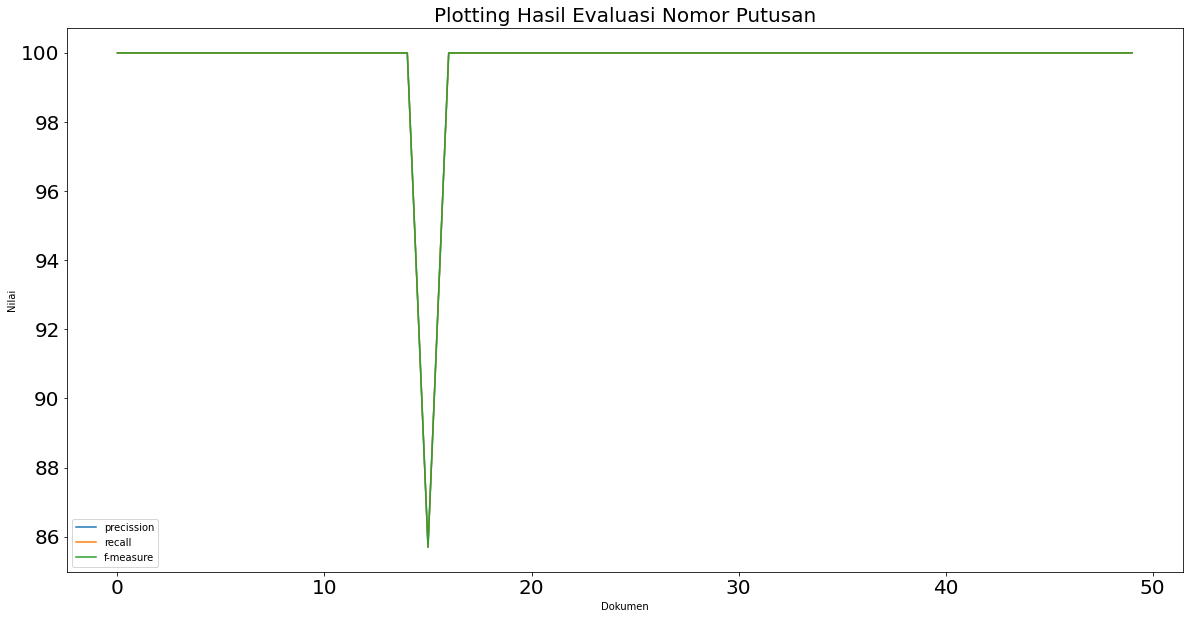

In [ ]:
plotting_evaluasi(nomor_pd,"Nomor Putusan")
print("\n")
plotting_evaluasi(pemohon_pd,"Pemohon Kasasi")
print("\n")
plotting_evaluasi(termohon_pd,"Termohon Kasasi")
print("\n")
plotting_evaluasi(pokok_perkara_lsa_pd,"Pokok Perkara LSA")
print("\n")
plotting_evaluasi(pokok_perkara_clsa_pd,"Pokok Perkara CLSA")
print("\n")
plotting_evaluasi(pertimbangan_hakim_lsa_pd,"Pertimbangan Hakim LSA")
print("\n")
plotting_evaluasi(pertimbangan_hakim_clsa_pd,"Pertimbangan Hakim CLSA")
print("\n")
plotting_evaluasi(amar_lsa_pd,"Amar LSA")
print("\n")
plotting_evaluasi(amar_clsa_pd,"Amar CLSA")

# **Evaluasi Ekstraksi Rangkuman Keseluruhan**

## 1. Load Data Pakar

In [ ]:
narasi = 'python/rangkuman_pakar/narasi/'
narasi = os.listdir(narasi)
narasi.sort()
hasil_narasi = []
for i in range(0,len(narasi)):
  path = "python/rangkuman_pakar/narasi/"+str(narasi[i])
  # load dokumen
  list_narasi = load_data_to_list_lower(path)
  list_narasi =  "".join(list_narasi)

  hasil_narasi.append(list_narasi)
hasil_narasi[0:5]

## 2. Mempersiapkan Rangkuman Sistem LSA

In [ ]:
all_rangkuman_lsa = []
for i in range(0,len(all_pemohon_kasasi)):
  pemohon = cari_nama_kasasi(all_pemohon_kasasi[i])
  termohon = cari_nama_kasasi(all_termohon_kasasi[i])
  pokok_perkara = all_lsa_pokok_perkara[i]
  pertimbangan_hakim = all_lsa_pertimbangan_hakim[i]
  amar = all_lsa_amar[i]
  rangkuman = "permohonan diajukan oleh {}, selanjutnya disebut pemohon kasasi/tergugat melawan {} selanjutnya termohon kasasi/penggugat. {}. berdasarkan pertimbangan dari hakim, maka {}. Sehingga dari pertimbangan tersebut diputuskan bahwa hakim : {}".format(pemohon,termohon,pokok_perkara,pertimbangan_hakim,amar)
  all_rangkuman_lsa.append(rangkuman)
all_rangkuman_lsa[0:5]

## 3. Mempersiapkan Rangkuman Sistem CLSA

In [ ]:
all_rangkuman_clsa = []
for i in range(0,len(all_pemohon_kasasi)):
  pemohon = cari_nama_kasasi(all_pemohon_kasasi[i])
  termohon = cari_nama_kasasi(all_termohon_kasasi[i])
  pokok_perkara = all_clsa_pokok_perkara[i]
  pertimbangan_hakim = all_clsa_pertimbangan_hakim[i]
  amar = all_clsa_amar[i]
  rangkuman = "permohonan diajukan oleh {}, selanjutnya disebut pemohon kasasi/tergugat melawan {} selanjutnya termohon kasasi/penggugat. {}. berdasarkan pertimbangan dari hakim, maka {}. Sehingga dari pertimbangan tersebut diputuskan bahwa hakim : {}".format(pemohon,termohon,pokok_perkara,pertimbangan_hakim,amar)
  all_rangkuman_clsa.append(rangkuman)
all_rangkuman_clsa[0:5]

## 4. Precission, Recall, F-Measure (LSA)

In [ ]:
scor_narasi_lsa = uji_rouge_1(narasi,all_rangkuman_lsa,hasil_narasi)

# input dan visualisasi ke dataframe
narasi_lsa_pd = pd.DataFrame(scor_narasi_lsa)
narasi_lsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
narasi_lsa_pd = narasi_lsa_pd.T
narasi_lsa_pd.to_csv (r'python/csv/narasi_rouge_lsa.csv', index = False, header=True)
narasi_lsa_pd[0:5]

## 5. Precission, Recall, F-Measure (CLSA)

In [ ]:
scor_narasi_clsa = uji_rouge_1(narasi,all_rangkuman_clsa,hasil_narasi)

# input dan visualisasi ke dataframe
narasi_clsa_pd = pd.DataFrame(scor_narasi_clsa)
narasi_clsa_pd.rename(index={0:'Rang.Sistem',1:'Rang.Pakar',2:'Preccsion',3:'Recall',4:'F-Measure'}, inplace=True)
narasi_clsa_pd = narasi_clsa_pd.T
narasi_clsa_pd.to_csv (r'python/csv/narasi_rouge_clsa.csv', index = False, header=True)
narasi_clsa_pd[0:5]

## 6. Min, Max, Avg (LSA)

In [ ]:
min_max_avg_eval(narasi_lsa_pd)

## 7. Min, Max, Avg (CLSA)

In [ ]:
min_max_avg_eval(narasi_clsa_pd)

## 8. Tampilkan hasil grafik evaluasi LSA dan CLSA

In [ ]:
plotting_evaluasi(narasi_lsa_pd,"Perangkuman dengan LSA")
plotting_evaluasi(narasi_clsa_pd,"Perangkuman dengan CLSA")

# **Ekstrak hasil rangkuman ke txt**

In [ ]:
# LSA
wr = open("python/Summary lsa.txt", "w")
wr.write("RANGKUMAN LSA\n")
wr.write("==================================================================================================\n")
wr.write("Dokumen   : "+narasi[0]+"\n")
wr.write("Rangkuman :\n"+all_rangkuman_lsa[0]+"\n")
wr.write("==================================================================================================\n")
wr.close()
for i in range(1,len(all_rangkuman_lsa)):
  ap = open("python/Summary lsa.txt", "a")
  ap.write("Dokumen   : "+narasi[i]+"\n")
  ap.write("Rangkuman :\n"+all_rangkuman_lsa[i]+"\n")
  ap.write("==================================================================================================\n")
  ap.close()

In [ ]:
# CLSA
wr = open("python/Summary clsa.txt", "w")
wr.write("RANGKUMAN CLSA\n")
wr.write("==================================================================================================\n")
wr.write("Dokumen   : "+narasi[0]+"\n")
wr.write("Rangkuman :\n"+all_rangkuman_clsa[0]+"\n")
wr.write("==================================================================================================\n")
wr.close()
for i in range(1,len(all_rangkuman_clsa)):
  ap = open("python/Summary clsa.txt", "a")
  ap.write("Dokumen   : "+narasi[i]+"\n")
  ap.write("Rangkuman :\n"+all_rangkuman_clsa[i]+"\n")
  ap.write("==================================================================================================\n")
  ap.close()